In [9]:
# Define dentro de la librería el problema de Oscilador armónico 
using OrdinaryDiffEq, Plots

In [10]:
# Parámetro 
w = 3.51

3.51

### Recordando:

\begin{eqnarray*}
 \ddot{x} + s^{2} x = 0
\end{eqnarray*}

### Donde la solución está dada por:

\begin{eqnarray*}
\big( u(t), v(t) \big)& = &\big( A \cos(st - \phi), -A \cdot s \sin(s t - \phi) \big) \\  
 A & = & (r_{1} + r_{2})^{\frac{1}{2}} \\
 \phi & =& \tan^{-1} \frac{r_{1} }{r_{2}} 
\end{eqnarray*}

#### Donde $r_{1}$ y $r_{2}$ son constantes que detrminan la condición inicial $c_{1}$ es la posición inicial de movimiento oscilatorio descripto por $w\cdot c_{2}$ .

#### A diferencia de python al indicar la librería, con el comando  "ODEproblem" que sólo incluye las ecuaciones lineales; se puede incluir también "SecondOrderproblem" para este caso

 ## Condiciones Iniciales del problema:

In [11]:
X_0 = [-10.0]
dX_0 = [π/2] #Ventaja de Julia: reconoce símbolos matemáticos sin previas librerías
tspan = (0.0, π) # Valor de inicio del integrador numérico

(0.0, π)

In [12]:
ϕ = atan( (dX_0[1]/w)/X_0[1])
A = √(X_0[1]^2 + dX_0[1]^2  )

10.12261829272804

### Definiendo el Problema del Oscilador Armónico:


In [13]:
function O_A(ddu,du,u,w,t)  #se definen en la declaración los parámetros a usar 
    ddu .= -w^2 * u   # define la relación (u*,v*) = (v,-w²*u) --- Strogatz example 5.1.1
end

O_A (generic function with 1 method)

## Resolución del problema mediante las librerías de JULIA

In [14]:
#Descripción del problema:
 P = SecondOrderODEProblem(O_A, dX_0, X_0, tspan, w)
# Se describe el problema en una sola línea
# 1) O_A: Se decribe el oscilador aarmónico
# 2) dX_0 : La dirección inicial del vector
# 3) X_0 : El punto inicial
# 4) tspan, w: parámetros 

ODEProblem with uType RecursiveArrayTools.ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}} and tType Float64. In-place: true
timespan: (0.0, 3.141592653589793)
u0: ([1.5707963267948966], [-10.0])

In [15]:
#Solución Numérica del problema del Oscilador Armónico 
sol = solve(P, DPRKN6())


retcode: Success
Interpolation: specialized 6th order interpolation
t: 29-element Vector{Float64}:
 0.0
 0.0007320871056360223
 0.0010927931623790756
 0.004699853729809609
 0.025718057068202405
 0.0735873389339155
 0.14426421520662938
 0.22312841720122514
 0.312215826701726
 0.4071648789237158
 0.5046090593799332
 0.602653848561356
 0.7171719456516767
 ⋮
 1.437129747015872
 1.5729220784932043
 1.7247184941166698
 1.8863042799232694
 2.0772509358305618
 2.2371391671329026
 2.3897799281072745
 2.543083892052898
 2.708250313037708
 2.8923038888096815
 3.0694192189435294
 3.141592653589793
u: 29-element Vector{RecursiveArrayTools.ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([1.5707963267948966], [-10.0])
 ([1.6539398710955246], [-9.998822184252436])
 ([1.6983726463903737], [-9.998217584457098])
 ([2.142538916957881], [-9.991290291600839])
 ([4.7215731927090285], [-9.919121904705767])
 ([10.477441600726817], [-9.554480686597387])
 ([18.39114916377284], [-8.5290454580

### GRÁFICO DE LA SOLUCIÓN:


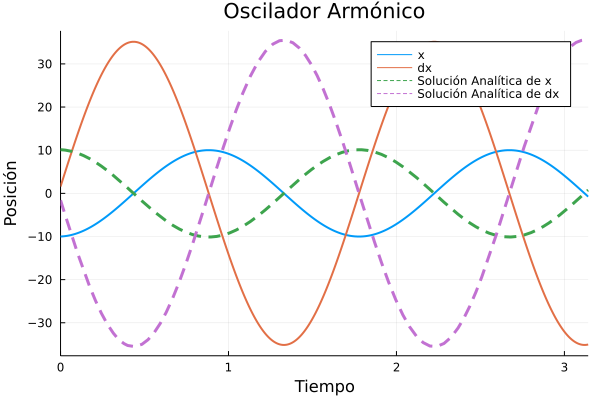

In [16]:
plot(sol, vars=[2,1], linewidth=2, title ="Oscilador Armónico", xaxis = "Tiempo", yaxis = "Posición", label = ["x" "dx"])
plot!(t->A*cos(w*t-ϕ), lw=3, ls=:dash, label="Solución Analítica de x")
plot!(t->-A*w*sin(w*t-ϕ), lw=3, ls=:dash, label="Solución Analítica de dx")